In [2]:
import os
from torchvision.io import decode_image
import random
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

covid_dir = "./xrays/COVID"
healthy_dir = "./xrays/HEALTHY"


# Check dataset imbalances 

The first thing we want to check is if Covid and healthy xray images are balanced in the dataset

In [3]:
# Count how many COVID and how many HEALTHY xray images we have 

count_covid = len(os.listdir(covid_dir))
count_healthy = sum(1 for file in os.listdir(healthy_dir) if not file.startswith("augmented"))

print(f"covid: {count_covid}", f"healthy: {count_healthy}", sep="\n")

covid: 3875
healthy: 1348


It seems that we have almost a 25%-75%, healthy-covid analogy. We can apply a data augmentation method on the minority class in order to balance the dataset. Lets see how many more samples from healthy we need

In [4]:
# Images to apply augmentation
resamples = count_covid - count_healthy
print(resamples)

2527


# Apply data augmentation on healthy set

We will follow the following process for data augmentation:

1. Take a sample with replacment of size 2527 from the 1348 healthy images
2. Apply horizontal and/or vertical flips to the previous sample, with probability of 80% for each flip
3. Add the previously modified sample to healthy images


In [6]:
# Take a random sample of indeces with replacement from healthy images
healthy_resamples = random.choices(range(1, count_healthy+1), k=resamples)

# Apply vertical and/or horizontal flips with 80% chance each, on each image
# Save the edited image as new
for i, idx in enumerate(healthy_resamples):
    image = Image.open(healthy_dir + f"/{idx}.jpeg")
    rand1 = random.randint(1, 10)
    rand2 = random.randint(1, 10)
    if rand1 <= 8:
        image = ImageOps.mirror(image)
    if rand2 <= 8:
        image = ImageOps.flip(image)
    image.save(healthy_dir + f"/augmented_{i+1}.jpeg")

print(f"resamples: {healthy_resamples}", f"sample size = {len(healthy_resamples)}", sep="\n")


resamples: [280, 1245, 878, 724, 904, 597, 992, 322, 742, 1274, 462, 20, 698, 1174, 1039, 273, 782, 1206, 45, 492, 1278, 406, 1099, 1251, 131, 359, 546, 892, 909, 1235, 1248, 501, 877, 88, 235, 1296, 39, 786, 1025, 1309, 484, 170, 644, 755, 533, 215, 727, 401, 396, 886, 1027, 1244, 1204, 246, 864, 341, 843, 50, 119, 83, 1244, 983, 303, 616, 457, 349, 664, 34, 1264, 662, 811, 910, 1152, 363, 626, 225, 41, 560, 1212, 862, 868, 526, 149, 729, 216, 1047, 1108, 935, 96, 1015, 1108, 701, 878, 587, 859, 1152, 690, 1185, 453, 196, 450, 428, 223, 84, 314, 925, 73, 1163, 25, 8, 99, 1134, 940, 657, 809, 887, 316, 763, 1324, 11, 301, 1208, 608, 595, 1117, 5, 227, 400, 1086, 782, 291, 213, 548, 263, 589, 155, 1074, 898, 922, 1168, 497, 202, 598, 472, 672, 138, 1281, 1135, 461, 1024, 1124, 564, 1233, 393, 87, 1067, 816, 1297, 1297, 1282, 313, 1028, 607, 77, 748, 104, 944, 659, 901, 1304, 486, 739, 887, 483, 1142, 1072, 22, 162, 248, 837, 229, 1014, 1129, 428, 1235, 1117, 1206, 1336, 97, 1327, 329, 2

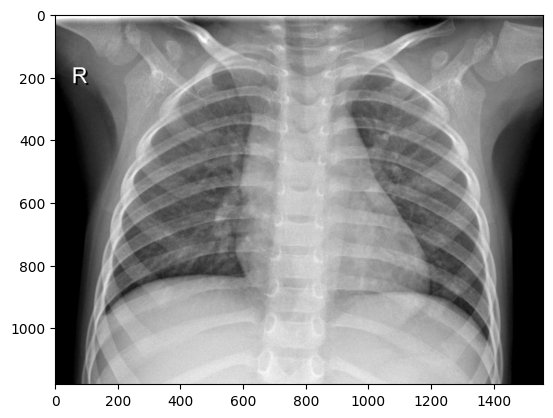

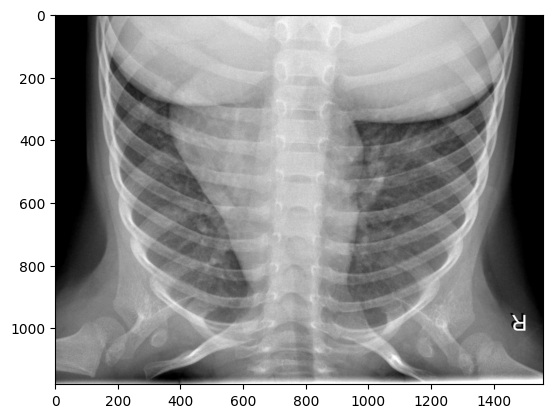

In [ ]:
# Show the first image in the resample with its modification
plt.figure()
plt.imshow(decode_image(healthy_dir + f"/{healthy_resamples[0]}.jpeg").permute(1,2,0), cmap= "gray")
plt.figure()
plt.imshow(decode_image(healthy_dir + f"/augmented_1.jpeg").permute(1,2,0), cmap= "gray")

# Data modification of covid set

The fact that only healthy images are flipped, may lead the model to conclusions that flipped images are healthy category and non flipped images are propably covid category, because the latter cases are more. Based on this assumption, we take an equal amount of random covid images and apply the same transformations in-place.

In [23]:
# Take an equal length random sample of indeces without replacement from covid images
covid_resamples = random.sample(range(1, count_covid+1), k=resamples)

# Apply vertical and/or horizontal flips with 80% chance each, on each image
for img in os.listdir(covid_dir):
    if int(img.split(".")[0]) in covid_resamples:
        image = Image.open(covid_dir + f"/{img}")
        rand1 = random.randint(1, 10)
        rand2 = random.randint(1, 10)
        if rand1 <= 8:
            image = ImageOps.mirror(image)
        if rand2 <= 8:
            image = ImageOps.flip(image)
        image.save(covid_dir + f"/{img}")

print(f"modified: {covid_resamples}", f"sample size = {len(covid_resamples)}", sep="\n")


modified: [2938, 1870, 2924, 3511, 3848, 1190, 1992, 980, 413, 2799, 3799, 1336, 98, 2901, 1399, 3610, 3137, 1408, 1309, 527, 1151, 3570, 3720, 1267, 1249, 260, 3365, 1209, 2377, 2027, 2050, 739, 3653, 3747, 3154, 938, 2871, 526, 3482, 1334, 3181, 3774, 2849, 1463, 592, 3313, 3429, 1959, 1715, 685, 3170, 1410, 915, 857, 1351, 2446, 355, 1765, 2436, 892, 1794, 3273, 2067, 1661, 1918, 521, 347, 2878, 3017, 1146, 3156, 530, 657, 2826, 1469, 969, 315, 2670, 2729, 2270, 1769, 2876, 225, 1621, 3390, 474, 953, 3699, 3164, 1069, 1575, 2664, 931, 1613, 282, 939, 3341, 3715, 989, 2084, 3543, 3417, 21, 469, 3796, 3178, 2742, 1409, 331, 1352, 164, 612, 634, 2102, 458, 3694, 554, 2123, 2467, 3420, 1607, 2213, 2105, 2510, 3591, 3508, 2641, 3299, 2200, 3707, 1060, 1583, 2951, 2886, 3209, 1714, 1856, 1078, 863, 2961, 2409, 1787, 216, 1453, 50, 2776, 2474, 562, 3074, 1892, 1241, 233, 3685, 1889, 2950, 2581, 1931, 127, 1325, 1218, 1674, 617, 134, 58, 3135, 3807, 269, 1790, 962, 3386, 1372, 1210, 3067, 3

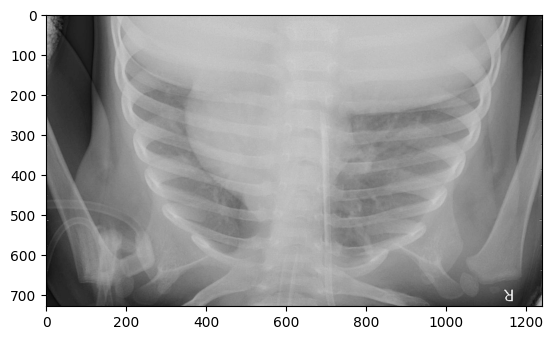

In [ ]:
# Show the first in-place modified image of the sample
plt.imshow(decode_image(covid_dir + f"/{covid_resamples[0]}.jpeg").permute(1,2,0), cmap = "gray")

# Split to train-validation

We select a random 10% of Covid and a random 10% of healthy dataset and then put it in the validation folder